In [1]:
import os, re, sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)

In [2]:
# %%time
# ### Kudos to Ottokyu (https://twitter.com/ottokyu) creator of https://sgwuhan.xose.net/ for making the data available
# ! python getDataFromSgWuhan.py
# import pickle as pkl
# with open('./data/sgwuhandata.pkl', 'rb') as f:
#     data_dict = pkl.load(f)
# data_dict['data']

In [3]:
d = {'Jan 23':1,'Jan 24':2,'Jan 25':0,'Jan 26':1,'Jan 27':1, 'Jan 28':2,'Jan 29':3,'Jan 30':2,'Jan 31':4,'Feb 1':2,\
    'Feb 2': 0, 'Feb 3': 0, 'Feb 4': 6, 'Feb 5':4, 'Feb 6': 2, 'Feb 7': 4, 'Feb 8':7, 'Feb 9': 3, 'Feb 10': 2, \
    'Feb 11': 2, 'Feb 12': 2, 'Feb 13': 8, 'Feb 14': 9, 'Feb 15': 5, 'Feb 16': 3, 'Feb 17': 2, 'Feb 18': 4, 'Feb 19': 3, \
    'Feb 20': 1, 'Feb 21': 1, 'Feb 22': 3, 'Feb 23': 0, 'Feb 24': 1}
r = {'Feb 4':1,'Feb 7':1,'Feb 9':4,'Feb 10':1,'Feb 11':2,'Feb 12': 6,'Feb 14': 2, 'Feb 15':1,'Feb 16': 1, 'Feb 17': 5,\
     'Feb 18': 5, 'Feb 19': 5, 'Feb 20': 3, 'Feb 21': 10, 'Feb 22': 2, 'Feb 23': 2, 'Feb 24': 2}

In [4]:
inf = pd.DataFrame.from_dict(d,orient='index',columns=['count']).reset_index()
inf.columns = ['Date','New Infected']

In [5]:
rec = pd.DataFrame.from_dict(r,orient='index',columns=['count']).reset_index()
rec.columns = ['Date','Recovered']

In [6]:
total = pd.merge(inf,rec,on='Date', how='left')

In [7]:
total['Recovered'].fillna(int(0), inplace=True)

In [8]:
total['Cumulative Infection'] = total['New Infected'].cumsum()
total['Cumulative Recovery'] = total['Recovered'].cumsum()

In [9]:
total

,Date,New Infected,Recovered,Cumulative Infection,Cumulative Recovery
0,Jan 23,1,0.0,1,0.0
1,Jan 24,2,0.0,3,0.0
2,Jan 25,0,0.0,3,0.0
3,Jan 26,1,0.0,4,0.0
4,Jan 27,1,0.0,5,0.0
5,Jan 28,2,0.0,7,0.0
6,Jan 29,3,0.0,10,0.0
7,Jan 30,2,0.0,12,0.0
8,Jan 31,4,0.0,16,0.0
9,Feb 1,2,0.0,18,0.0


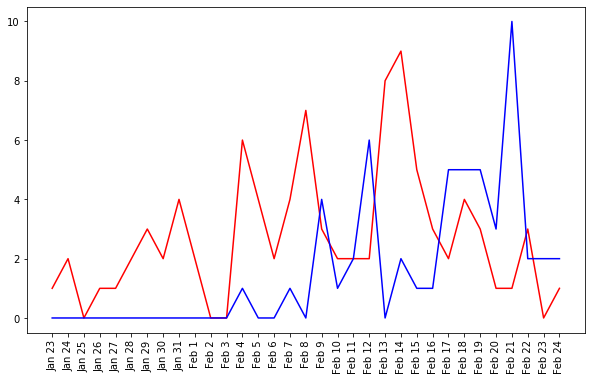

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
ax.plot(total['Date'], total['New Infected'], color='r')
ax.plot(total['Date'], total['Recovered'], color='b')
plt.show()

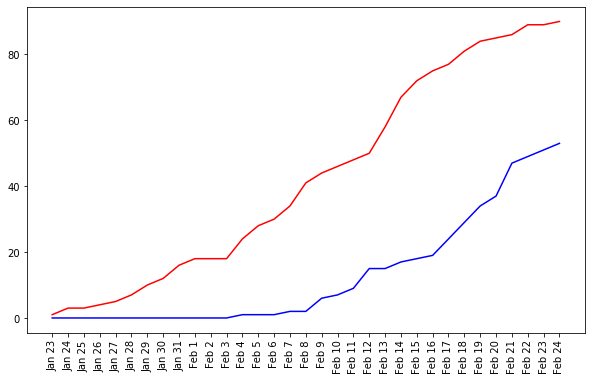

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
ax.plot(total['Date'], total['Cumulative Infection'], color='r')
ax.plot(total['Date'], total['Cumulative Recovery'], color='b')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


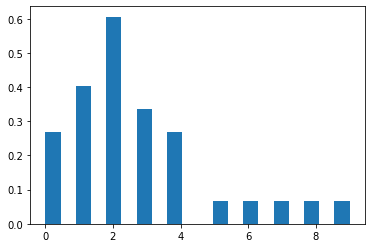

In [12]:
import seaborn as sb
plt.hist(total['New Infected'], bins = 20, normed = True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


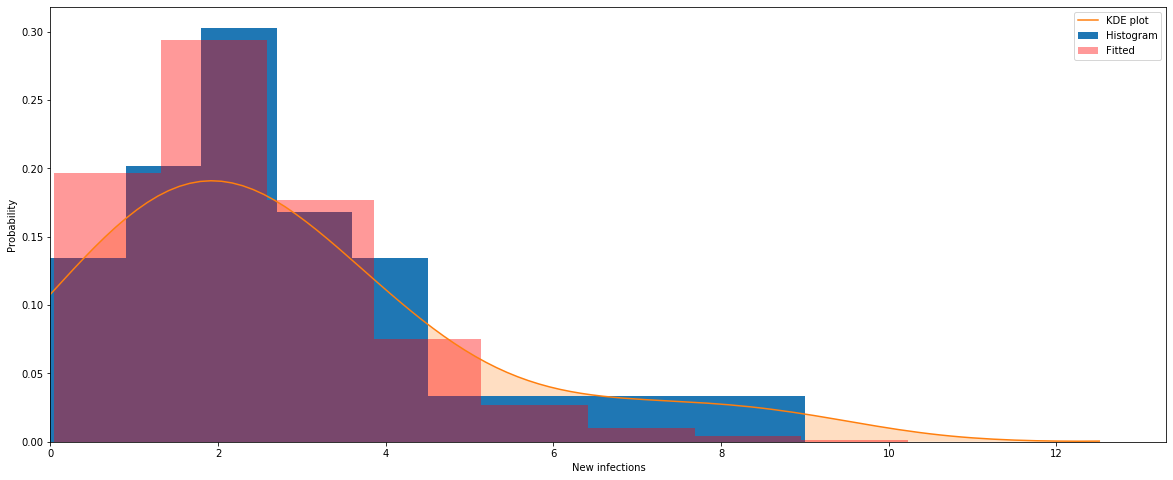

In [85]:
shape, scale = 2.7, 0.9 # manual
import scipy.special as sps
fig = plt.figure(figsize=(20,8))

gcount, gbins, ignored = plt.hist(total['New Infected'], bins=10, normed=True, label='Histogram')
sb.kdeplot(total['New Infected'], shade=True, label='KDE plot').set(xlim=(0))

g = np.random.gamma(shape, scale, 10000)
fcount, fbins, ignored = plt.hist(g, bins=10, normed=True, label='Fitted', alpha = 0.4, color='r')

plt.legend()
plt.ylabel("Probability")
plt.xlabel("New infections")
plt.show()

In [86]:
gcount, fcount

(array([0.13468013, 0.2020202 , 0.3030303 , 0.16835017, 0.13468013,
        0.03367003, 0.03367003, 0.03367003, 0.03367003, 0.03367003]),
 array([1.96773731e-01, 2.94257965e-01, 1.76601873e-01, 7.49576838e-02,
        2.66080155e-02, 1.02821535e-02, 4.08146550e-03, 1.09885610e-03,
        1.56979442e-04, 7.84897212e-05]))

In [87]:
from scipy.stats import chisquare

chisquare(f_obs=gcount,f_exp=fcount)

Power_divergenceResult(statistic=23.458368124805254, pvalue=0.0052449682112105924)

In [93]:
from scipy.stats import gamma, lognorm
print(gamma.fit(total['New Infected'], a=2.7, scale=1))
print(lognorm.fit(total['New Infected'], a=2.7, scale=1))

TypeError: Unknown arguments: {'a': 2.7}.

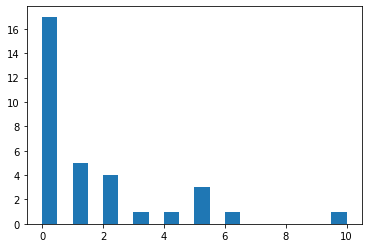

In [23]:
plt.hist(total['Recovered'], bins = 20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


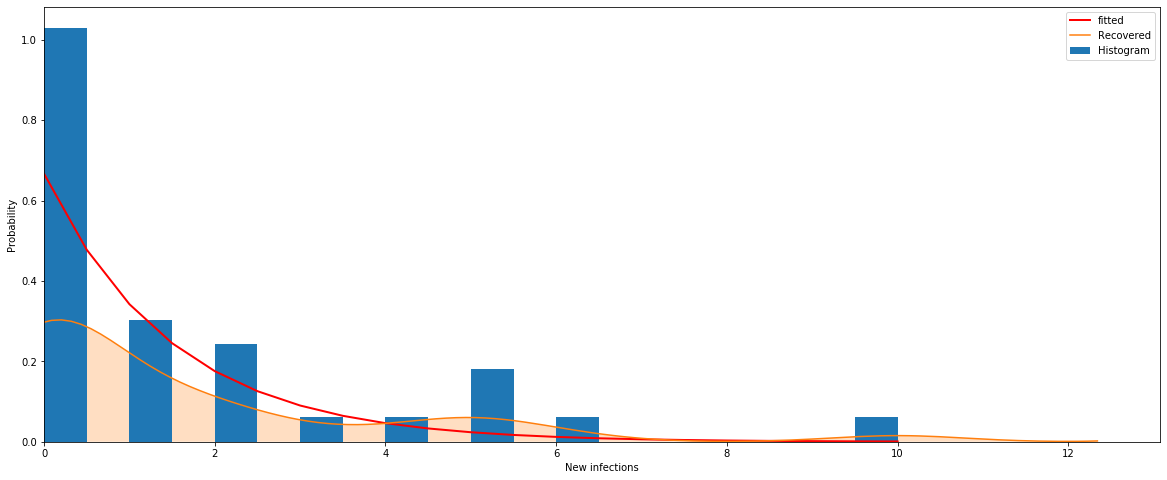

In [24]:
shape, scale = 1, 1.5 # manual
import scipy.special as sps
fig = plt.figure(figsize=(20,8))

count, gbins, ignored = plt.hist(total['Recovered'], bins=20, normed=True, label='Histogram')
y = gbins**(shape-1)*(np.exp(-gbins/scale) /(sps.gamma(shape)*scale**shape))
plt.plot(gbins, y, linewidth=2, color='r', label='fitted')
sb.kdeplot(total['Recovered'], shade=True).set(xlim=(0), label='KDE plot')

plt.ylabel("Probability")
plt.xlabel("New infections")
plt.show()

## SEIR model
- to overlay

In [189]:
incubation_duration = 8
infectious_duration = 14

beta = 0.3
sigma = 1/incubation_duration # incubation rate
gamma = 1/infectious_duration # recovery rate

In [202]:
N = 500000   # Total population as an arbituary number, putting it as the size of Singapore's population
I0, R0 = 1, 0 # Initial number of Infected (base on first case of Wuhan infection) and Recovered cases
E0 = 5 # initial number of Exposed cases
S0 = N - E0 - I0 - R0 # initial susceptible population

In [203]:
## to simulate over the next n days
n_days = 360
t = np.linspace(0, n_days, n_days)

In [204]:
def deriv(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E 
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [205]:
from scipy.integrate import odeint

# Initial conditions vector
y0 = S0, E0, I0, R0
# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, sigma, gamma))
S, E, I, R = ret.T

In [206]:
from datetime import datetime

date_start = datetime.strptime('2020-01-23', '%Y-%m-%d')
datelist = pd.date_range(date_start,periods=n_days).to_list()
dates = [str(d.date()) for d in datelist]

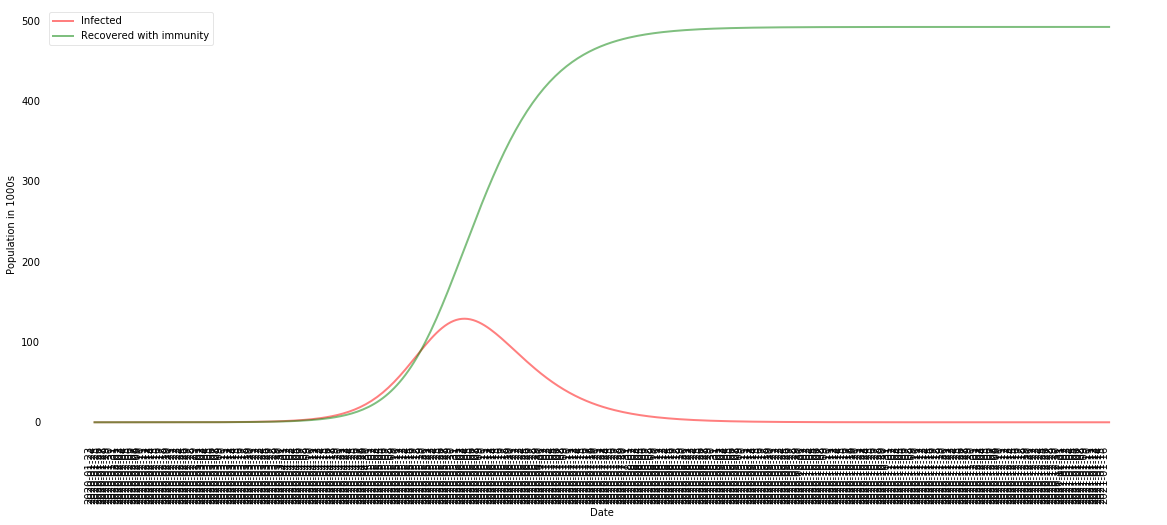

In [212]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
# ax.plot(dates, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
# ax.plot(dates, E/1000, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(dates, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(dates, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')

ax.set_xticklabels(dates, rotation = 90, ha="right")
ax.set_xticks(range(n_days),5)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlabel('Date')
ax.set_ylabel(f'Population in {1000}s')
# ax.set_ylim(0,N+0.2*N)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [208]:
dates[I.argmax()]

'2020-06-02'

In [209]:
total['Infected_Simulated'] = np.round(I[:len(d)])
total['Recovered_Simulated'] = np.round(R[:len(d)])

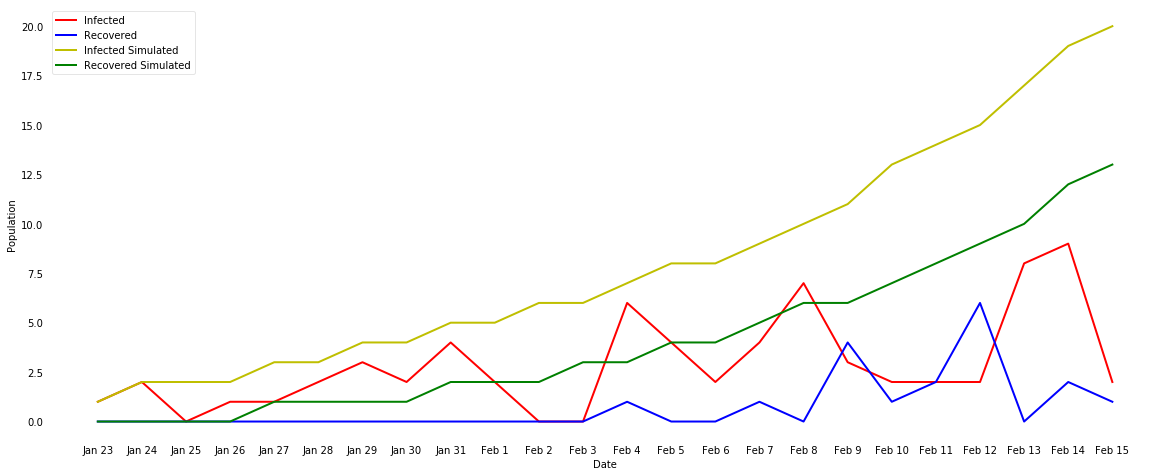

In [210]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
ax.plot(total['Date'], total['Infected'], lw=2, label='Infected', color='r')
ax.plot(total['Date'], total['Recovered'], lw=2, label='Recovered', color='b')
ax.plot(total['Date'], total['Infected_Simulated'], lw=2, label='Infected Simulated', color='y')
ax.plot(total['Date'], total['Recovered_Simulated'], lw=2, label='Recovered Simulated', color='g')

# ax.plot(dates, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')

ax.set_xticks(range(len(d)),2)
# ax.set_xticklabels(dates, rotation = 30, ha="right")
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlabel('Date')
ax.set_ylabel(f'Population')
# ax.set_ylim(0,N+0.2*N)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()